# **This File is divided into:**

**1) Introduction to Class Imbalance**

**2) Why Balancing is Important**

**3) Evaluation Metrics for Imbalanced Data**

**4) Data-Level Techniques (with advantages, disadvantages, and use cases):**

--Random Undersampling

--Random Oversampling

--SMOTE

--SMOTE + ENN (SMOTEENN)

**5) Algorithm-Level Techniques:**

--Class Weighting



# 1. Introduction to Class Imbalance

In real-world machine learning problems, we often encounter datasets where one class is significantly more frequent than the other(s). This situation is called class imbalance.

**Example:**

Fraud Detection: 98% transactions are normal, 2% are fraud.

Disease Diagnosis: 95% are healthy, 5% are affected.


# 2. Why is Class Imbalance a Problem?

Most machine learning algorithms assume equal class distribution. With imbalance:

The model biases towards the majority class.

It may give high accuracy but poor recall/precision for the minority class.

Important real-world cases (e.g., fraud, disease) may be missed.

# 3. Evaluation Metrics for Imbalanced Data

Instead of accuracy, we use:

**Precision:** Out of predicted positives, how many are correct.

**Recall (Sensitivity):** Out of actual positives, how many are correctly predicted.

**F1-Score:** Harmonic mean of precision and recall.

**Confusion Matrix:** Helps visualize true positives, false positives, etc.

**ROC-AUC:** Evaluates classifier performance across thresholds.


# 4. Data-Level Techniques

**a. Random Undersampling**

What it is: Reduces the size of the majority class by randomly removing examples.

Use case: When dataset is large, and we want quicker training.

**Advantages:**

Reduces training time

Simple and easy to implement

**Disadvantages:**

May lose important data from majority class

Can underperform if majority class is reduced too much

**b. Random Oversampling**

What it is: Duplicates examples from the minority class to balance the data.

Use case: When we have fewer data points and want to avoid losing data.

**Advantages:**

No loss of original data

Easy to apply

**Disadvantages:**

Can lead to overfitting due to repeated data

No new information is added

**c. SMOTE (Synthetic Minority Oversampling Technique)**

What it is: Creates synthetic data points for the minority class by interpolating between real examples.

Use case: Better for creating more informative samples rather than copying.

**Advantages:**

Reduces overfitting seen in random oversampling

Adds new data, not just copies

**Disadvantages:**

May create overlapping classes

Assumes feature space is continuous, not ideal for categorical variables

**d. SMOTE + ENN (SMOTEENN)**

What it is: First uses SMOTE to oversample, then ENN (Edited Nearest Neighbors) to remove ambiguous or noisy samples.

Use case: When we want synthetic data + clean data.

**Advantages:**

Balances data + improves quality

Handles borderline/noisy examples better

**Disadvantages:**

More complex and computationally expensive

May remove some useful borderline cases

# 5. Algorithm-Level Techniques

**a. Class Weighting**

What it is: Assigns higher penalty to misclassifying the minority class.

Use case: When you don’t want to change the data distribution but want to inform the algorithm to "pay more attention" to the minority class.

**Advantages:**

No data is removed or added

Many models support it (Logistic Regression, Random Forest, etc.)

**Disadvantages:**

Needs tuning of weights

May not work well for extremely imbalanced datasets



In [ ]:
# Create a imbalance data
# 95%-No , 5%-Yes
from sklearn.datasets import make_classification
X,Y=make_classification(n_samples=5000 , n_features=10 , weights=[0.95 , 0.05] , random_state=42)

In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9
0,1.864200,-2.371159,-0.671308,-0.666403,1.313473,0.089198,-2.025296,-0.673544,-0.696461,-0.076865
1,0.335487,0.271304,-2.020151,-0.026345,1.237954,-0.821913,-0.135680,0.317409,0.385470,0.133730
2,0.146633,-1.544279,0.592521,-0.533506,2.098841,0.630108,-1.675337,-0.205581,-1.030095,-0.658175
3,1.381038,1.705665,0.592245,-0.422983,-0.236920,-0.183078,-1.774660,2.598429,-0.485876,-2.627336
4,1.909303,0.752866,0.215403,-0.141142,0.365654,-0.289065,-0.620162,1.040194,-1.217340,0.650181
...,...,...,...,...,...,...,...,...,...,...
4995,-1.869980,-0.456454,0.690073,0.172400,-0.291520,-0.709841,0.686945,-0.834066,-0.350569,1.752429
4996,1.485217,-0.521684,1.117632,-0.096900,-0.772509,0.501852,-0.267543,-0.264658,0.739759,-0.342994
4997,-1.067255,0.356959,0.408854,-0.072746,1.358744,0.539942,-0.314902,0.506838,-1.311666,-2.015771
4998,1.212491,-2.101953,-0.818134,-0.716675,-0.488136,-2.033299,-2.246343,-0.302059,0.395469,-1.164547


In [ ]:
df2=pd.DataFrame(Y)
df2

,0
0,0
1,0
2,1
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [ ]:
from collections import Counter
'''
Total values = 5000

Yes - 278
No- 4722

'''
Counter(Y)

Counter({np.int64(0): 4722, np.int64(1): 278})

Text(0.5, 1.0, 'Count of target column classes')

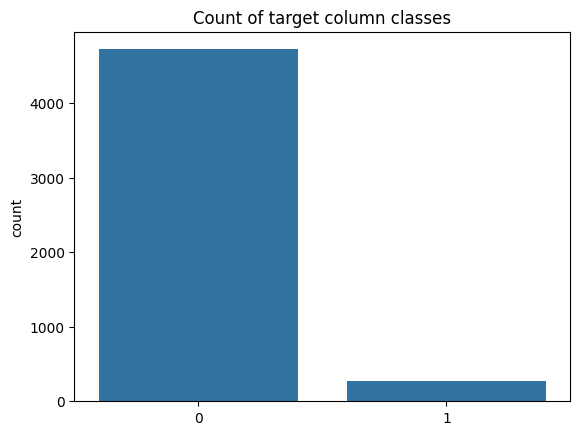

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=Y)
plt.title("Count of target column classes")

# Original Model Without Balancing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

x_train , x_test , Y_train , Y_test = train_test_split ( X , Y , test_size=0.2 , random_state=0)
model = LogisticRegression()
print("Count of values in target column of training data is  is :", Counter(Y_train))
model.fit(x_train , Y_train)
y_pred = model.predict(x_test)
print(classification_report(Y_test , y_pred))

Count of values in target column of training data is  is : Counter({np.int64(0): 3770, np.int64(1): 230})
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       952
           1       0.87      0.27      0.41        48

    accuracy                           0.96      1000
   macro avg       0.92      0.63      0.70      1000
weighted avg       0.96      0.96      0.95      1000



# Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

x_new , y_new = ros.fit_resample(x_train , Y_train)
print("Count of values is :", Counter(y_new))

model.fit(x_new , y_new)
y_pred = model.predict(x_test)
print(classification_report(Y_test , y_pred))

Count of values is : Counter({np.int64(0): 3770, np.int64(1): 3770})
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       952
           1       0.21      0.90      0.34        48

    accuracy                           0.83      1000
   macro avg       0.60      0.86      0.62      1000
weighted avg       0.96      0.83      0.88      1000



# Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

x_new , y_new = rus.fit_resample(x_train , Y_train)
print("Count of values is :", Counter(y_new))

model.fit(x_new , y_new)
y_pred = model.predict(x_test)
print(classification_report(Y_test , y_pred))

Count of values is : Counter({np.int64(0): 230, np.int64(1): 230})
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       952
           1       0.19      0.88      0.32        48

    accuracy                           0.82      1000
   macro avg       0.59      0.85      0.61      1000
weighted avg       0.95      0.82      0.87      1000



# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_new , y_new = sm.fit_resample(x_train , Y_train)
print("Count of values is :", Counter(y_new))

model.fit(x_new , y_new)
y_pred = model.predict(x_test)
print(classification_report(Y_test , y_pred))


Count of values is : Counter({np.int64(0): 3770, np.int64(1): 3770})
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       952
           1       0.22      0.90      0.35        48

    accuracy                           0.84      1000
   macro avg       0.61      0.87      0.63      1000
weighted avg       0.96      0.84      0.88      1000



# SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN
smoteen = SMOTEENN()

x_new , y_new = smoteen.fit_resample(x_train , Y_train)
print("Count of values is :", Counter(y_new))

model.fit(x_new , y_new)
y_pred = model.predict(x_test)
print(classification_report(Y_test , y_pred))

Count of values is : Counter({np.int64(1): 3728, np.int64(0): 3137})
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       952
           1       0.19      0.92      0.31        48

    accuracy                           0.81      1000
   macro avg       0.59      0.86      0.60      1000
weighted avg       0.96      0.81      0.86      1000



# Class Weightin

In [ ]:
model2=LogisticRegression(class_weight="balanced")
print("Count of values in target column of training data is  is :", Counter(Y_train))
model2.fit(x_train , Y_train)
y_pred = model2.predict(x_test)
print(classification_report(Y_test , y_pred))

Count of values in target column of training data is  is : Counter({np.int64(0): 3770, np.int64(1): 230})
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       952
           1       0.21      0.90      0.34        48

    accuracy                           0.83      1000
   macro avg       0.60      0.86      0.62      1000
weighted avg       0.96      0.83      0.88      1000



In [ ]:
print(confusion_matrix(Y_test , y_pred))

[[792 160]
 [  5  43]]


In [ ]:
'''
Precision= Out of all times your model said yes and how many times was it actually correct ( Avoiding False Positive )
Recall= Out of all the actual Yes how many did your model find  ( Avoiding False negative )

Precision = TP / (TP+FP)
Recall = TP / (TP+FN )

'''